In [1]:
import pandas as pd
from pymongo import MongoClient
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn
import string

from sklearn.feature_extraction.text import CountVectorizer
import datetime
import random

%matplotlib inline

The purpose of this notebook is to develop the Trend class and ensure that it plots correctly

In [2]:
client = MongoClient('mongodb://localhost:27017/')
db = client['parsedA']
posts = db['post0-5000s']
cursor = posts.find()


In [3]:
df =  pd.DataFrame(list(cursor))

I have to deal with the dates. My plan is to turn my list of ints represent year, month and day into a pandas series of dates. I'm going to do this VERY SLOWLY.


In [34]:
dates_series_1 = df.date
type(dates_series)

pandas.core.series.Series

okay, take a breath. You have a series of lists. You want to turn those lists in a string. You want to join each element of the list with commas in between

In [39]:
dates_series_2 = []
for item in dates_series_1:
    s = "{}, {}, {}".format(item[0], item[1], item[2])
    dates_series_2.append(s)
    

In [43]:
dates_series_2 = pd.Series(dates_series_2)
dates_series_3 = pd.to_datetime(dates_series_2)


In [45]:
type(dates_series_3[5])

pandas.tslib.Timestamp

In [49]:
def coerce_to_datetime(series):
    series_2 = []
    for item in series:
        s = "{}, {}, {}".format(item[0], item[1], item[2])
        series_2.append(s)
    series_2 = pd.Series(series_2)
    series_3 = pd.to_datetime(series_2)
    return series_3

In [51]:
df['datetime'] = coerce_to_datetime(df.date)

In [52]:
df.head()

,_id,chic_points,comments,date,favorites,followers,garment_links,id,location,main_photo,photo_desc,post_id,style_council,subphotos,tags,title,username,votes,datetime
0,582cd92ab9ed3a07007ad6d0,31081,2,"[2008, 3, 2]",2,160155,"[cashmere, free people top]",1,"San Francisco, CA",http://images2.chictopia.com/photos/CheriChict...,\nWelcome to Chictopia! A community where peop...,1,Style_council,No Subphotos,"[Romantic, Work Happy Hour, Summer]",The fashion maven,CheriChictopia,11,2008-03-02
1,582cd92bb9ed3a07007ad6d1,431,1,"[2008, 3, 2]",0,5,"[parka, coat]",2,"San Francisco, CA",http://images0.chictopia.com/photos/mikajones/...,\nA winter look out on the town. I thought th...,2,Style_council,No Subphotos,"[Urban, Everyday, Summer]",Striped parka,mikajones,0,2008-03-02
2,582cd92bb9ed3a07007ad6d2,431,0,"[2008, 3, 2]",0,5,"[white, cashmere, scarf]",3,"San Francisco, CA",http://images2.chictopia.com/photos/mikajones/...,"\nI dont know if shes a student, but I thought...",3,Style_council,No Subphotos,"[Trendy, Everyday, Summer]",College Hip,mikajones,0,2008-03-02
3,582cd92bb9ed3a07007ad6d3,431,0,"[2008, 3, 2]",0,5,"[blue, down, jacket]",4,"San Francisco, CA",http://images2.chictopia.com/photos/mikajones/...,"\nThis is a bundle of cozy scarf, jacket and u...",4,Style_council,No Subphotos,"[Comfortable, Everyday, Summer]",Winter wear,mikajones,1,2008-03-02
4,582cd92cb9ed3a07007ad6d4,431,0,"[2008, 3, 2]",0,5,"[blue, knit, jacket]",5,"San Francisco, CA",http://images2.chictopia.com/photos/mikajones/...,\nI thought this was a comfortable but stylish...,5,Style_council,No Subphotos,"[Comfortable, Everyday, Summer]",Urban cozy-wear,mikajones,0,2008-03-02


In [53]:
test = df.sample(frac=0.15)
train_and_cross_val = df.loc[~df.index.isin(test.index)]

In [54]:
cross_val = train_and_cross_val.sample(frac=0.2)
train = train_and_cross_val.loc[~train_and_cross_val.index.isin(cross_val.index)]

In [110]:
class Trend(object):

    def __init__(self, phrase, garment_type):
        self.phrase = phrase
        self.type = garment_type


    def plot_over_time(self, df, date_begin, date_end):
        '''
        Creates a plot showing the term frequency of the Trend
        over a given date range
        INPUT: dataframe contaiing dates and descriptions,
                start and end date in std format ['1980-01-15']
        OUTPUT: matplotlib object
        '''

        term_frequencies_by_day = []
        rng = pd.date_range(date_begin, date_end)
        print rng
    
        for a_date in rng:
            mask = df.datetime == a_date
            segment = df[mask]
            segment = segment.photo_desc
            for row in segment:
                ct = 0
                if self.phrase in row:
                    ct+=1
            term_frequencies_by_day.append(ct)

        #plot dates on x axis, frequency on y-axis
        tf_plot = plt.plot(rng, term_frequencies_by_day)
        return tf_plot
    
    
    
    

In [115]:
dress = Trend("dress", "allover")
gladiator = Trend("gladiator", "shoes")
jeans = Trend("jeans", "pants")


DatetimeIndex(['2008-03-02', '2008-03-03', '2008-03-04', '2008-03-05',
               '2008-03-06', '2008-03-07', '2008-03-08', '2008-03-09',
               '2008-03-10', '2008-03-11',
               ...
               '2008-06-06', '2008-06-07', '2008-06-08', '2008-06-09',
               '2008-06-10', '2008-06-11', '2008-06-12', '2008-06-13',
               '2008-06-14', '2008-06-15'],
              dtype='datetime64[ns]', length=106, freq='D')


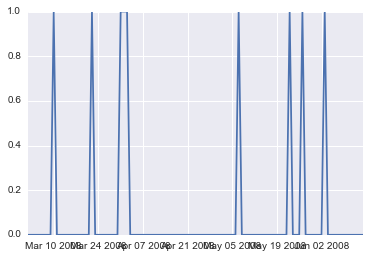

In [117]:
jeans.plot_over_time(train, '2008-03-02', '2008-06-15')